# Exercises in Clustering

In [304]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score

## Exercise 1

In this exercise, we will use a bike sharing dataset. The dataset contains coordinates of bike sharing stations in New York given as longitude and latitude values.

The dataset is am example dataset from the book ["Introduction to R for Business Intelligence"](https://jgendron.github.io/com.packtpub.intro.r.bi/), Packt Publishing Ltd., 2016, by Jay Gendron. The dataset is downloadable from Github [here](https://github.com/jgendron/com.packtpub.intro.r.bi/tree/master/Chapter5-ClusteringAnalysis/data), but is also available on Moodle as "Ch5_bike_station_locations.csv".

Answer the following questions:
1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.
2. Visualize the K-Means clustering result for the best K.
3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.
4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.
5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)
6. Visual the final DBSCAN clustering you decided upon in 5.
7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

### 1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.

In [181]:
df = pd.read_csv("../Notebooks and data-10/Ch5_bike_station_locations.csv")
df

,latitude,longitude
0,38.956590,-76.993437
1,38.905218,-77.001496
2,38.980858,-77.054722
3,38.902925,-76.929915
4,38.949498,-77.093620
...,...,...
239,38.965620,-77.060719
240,38.880730,-76.993533
241,38.924690,-76.978702
242,38.869303,-76.968034


In [182]:
X = df

In [183]:
X.var()

latitude     0.001256
longitude    0.001688
dtype: float64

In [184]:
import warnings
warnings.filterwarnings('ignore')

errors = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    errors.append(kmeanModel.inertia_)

#warnings.filterwarnings('default')

In [185]:
X.var()

latitude     0.001256
longitude    0.001688
dtype: float64

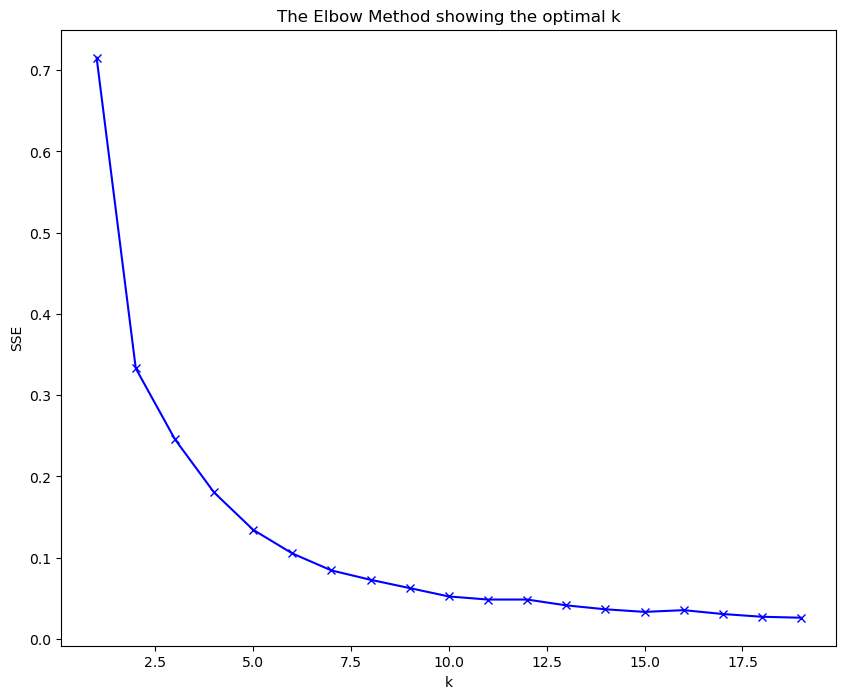

In [186]:
plt.figure(figsize=(10, 8))
plt.plot(K, errors, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [187]:
for i in range(1, len(errors)):
    print('K={0}: {1}'.format(i+1, errors[i-1] - errors[i]))

K=2: 0.38226918533418536
K=3: 0.08723771447654133
K=4: 0.06547757838190735
K=5: 0.04600020116640313
K=6: 0.029072581084034432
K=7: 0.02092732372777617
K=8: 0.011494603678869064
K=9: 0.010233456987670725
K=10: 0.010285543186740853
K=11: 0.0037981802313288154
K=12: -4.771041896320383e-06
K=13: 0.007189139860313089
K=14: 0.004816657267474107
K=15: 0.003179837620246602
K=16: -0.0021224459088949876
K=17: 0.004744268706865021
K=18: 0.00338715393295699
K=19: 0.0011755314575388788


In [188]:
def create_cluster(_X, k):
    _X = _X.copy()
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    _X["kMeansCluster"] = kmeans.labels_

    sns.scatterplot(data = _X, x = "latitude", y = "longitude", hue = "kMeansCluster")
    plt.scatter(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], color='blue', s = 100)
    plt.title("-Means clustering of the latitude and longitude")
    plt.show()

### 2. Visualize the K-Means clustering result for the best K.

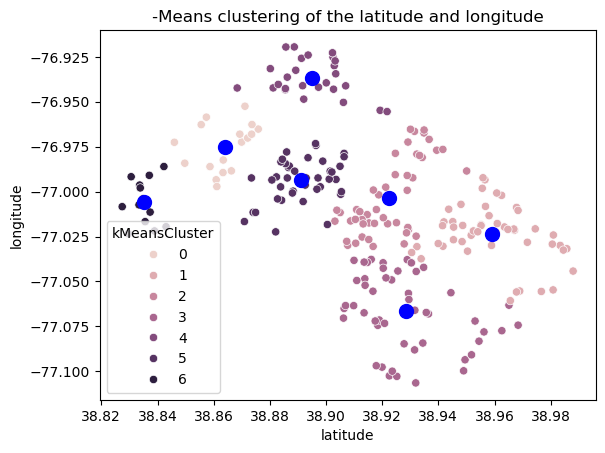

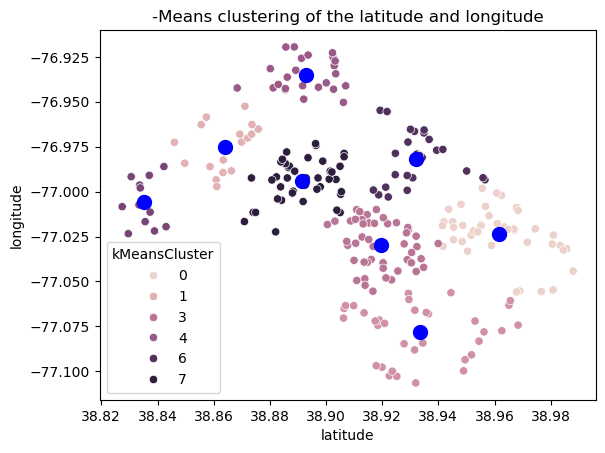

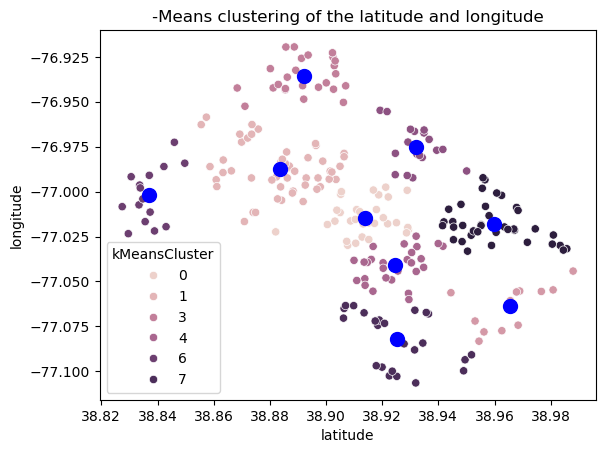

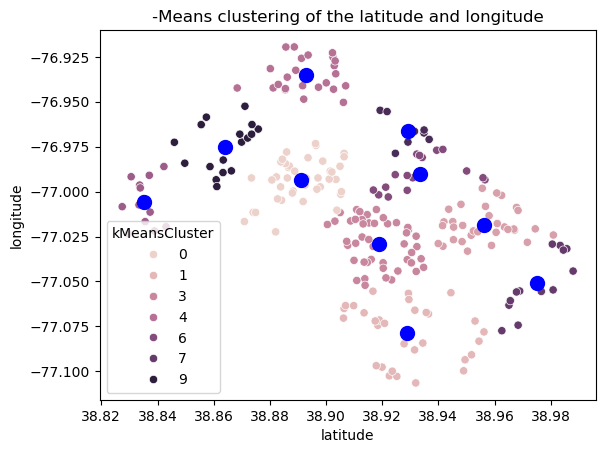

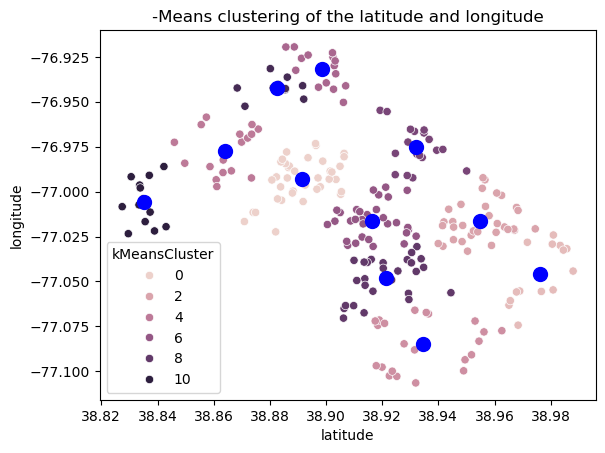

In [189]:
_range = [7,8,9,10,11]
for i in _range:
    create_cluster(X, i) 

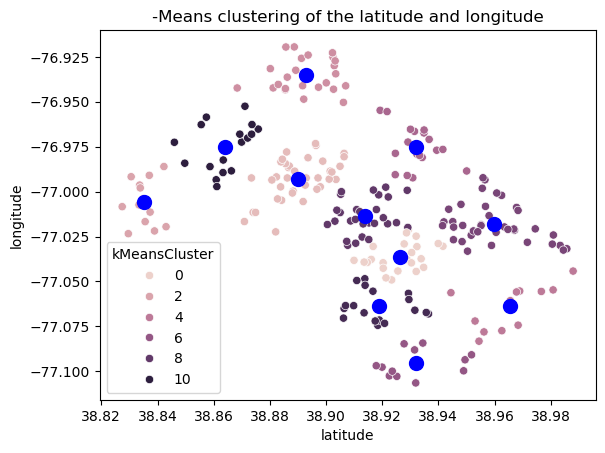

In [190]:
create_cluster(X, 11)

### 3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.

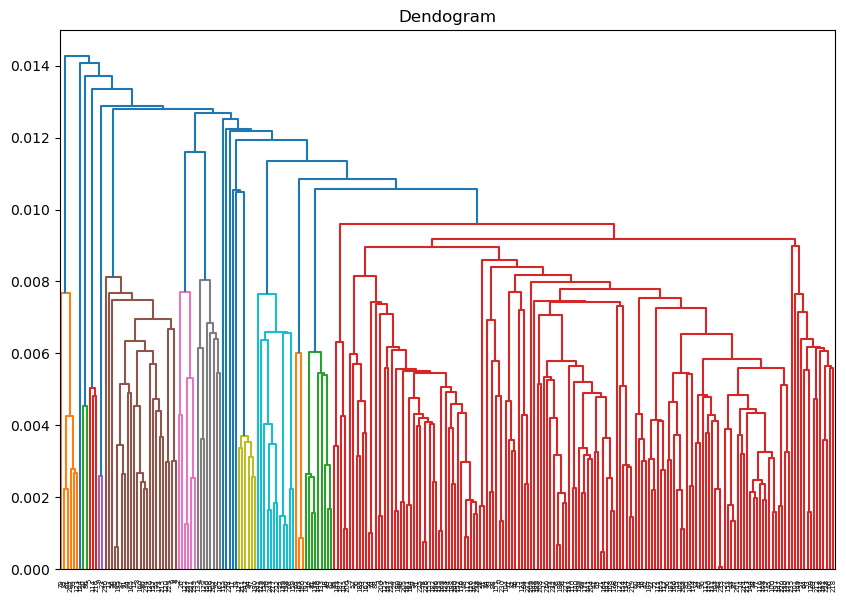

In [191]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(X, method='single'))
plt.show()

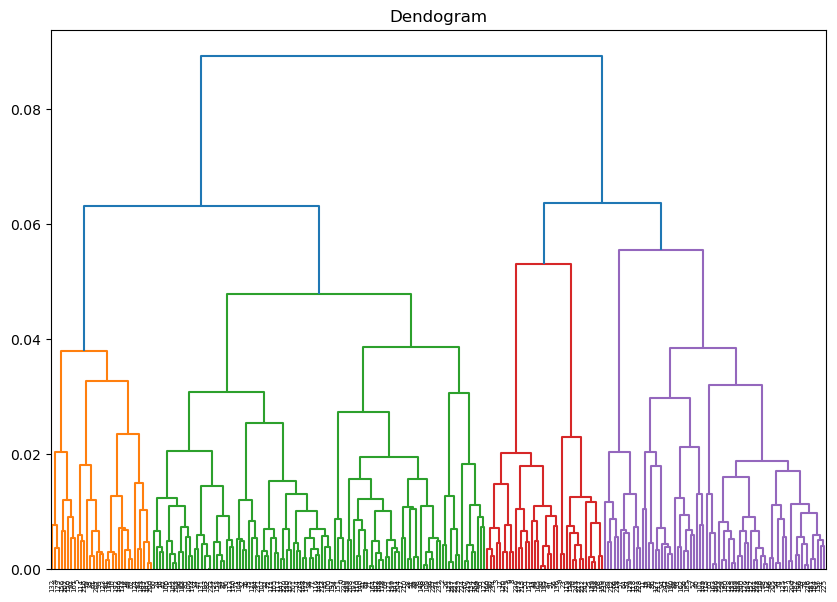

In [192]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(X, method='average'))
plt.show()

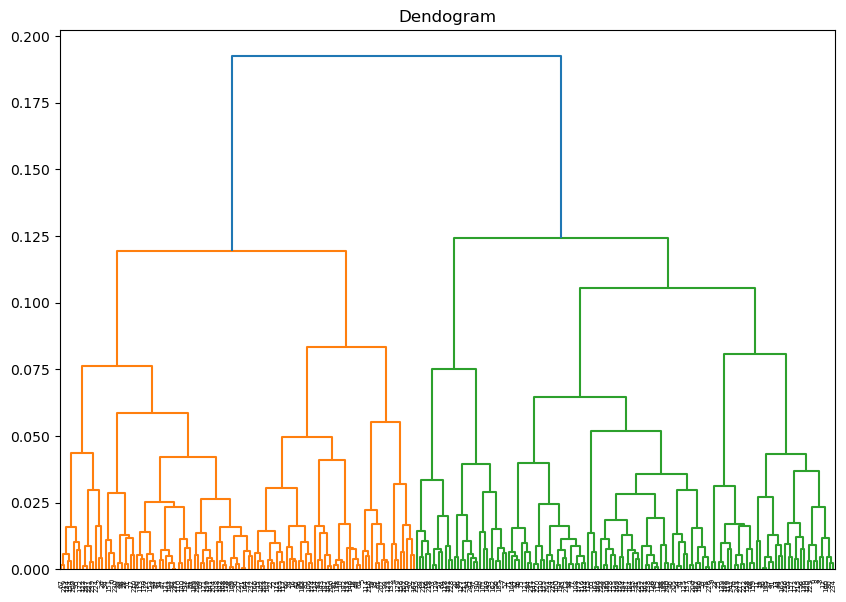

In [193]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(X, method='complete'))
plt.show()

In [194]:
X

,latitude,longitude
0,38.956590,-76.993437
1,38.905218,-77.001496
2,38.980858,-77.054722
3,38.902925,-76.929915
4,38.949498,-77.093620
...,...,...
239,38.965620,-77.060719
240,38.880730,-76.993533
241,38.924690,-76.978702
242,38.869303,-76.968034


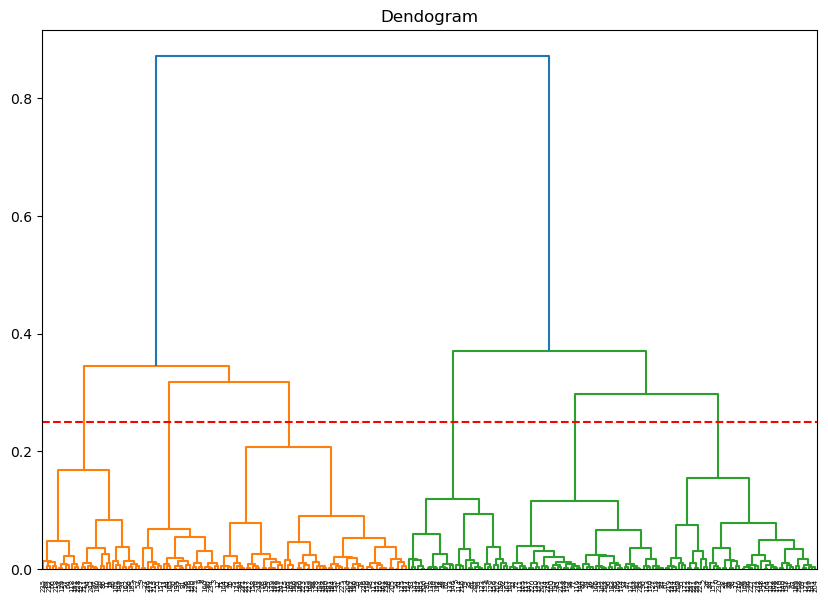

In [195]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.show()

    Result of the best line seems to be 6

### 4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.

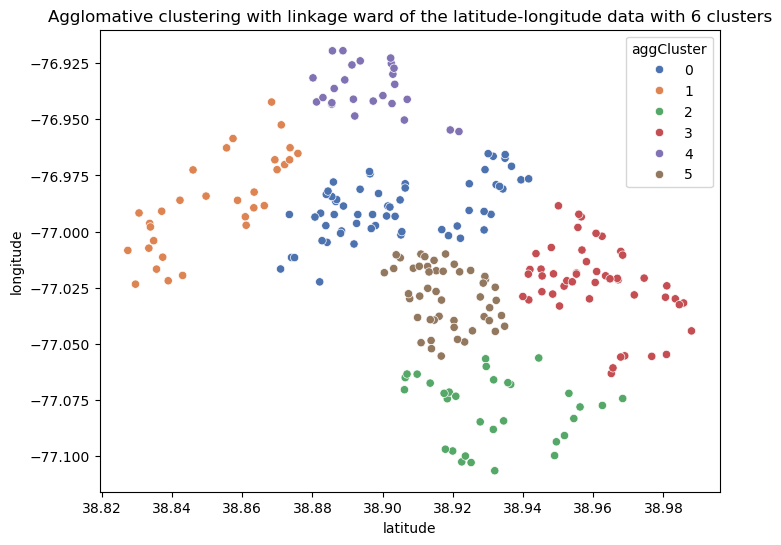

In [196]:
agg = AgglomerativeClustering(6)

X_temp = X.copy()

agg.fit(X)
X_temp["aggCluster"] = agg.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data = X_temp, x = "latitude", y = "longitude", hue = "aggCluster", palette="deep")
plt.title("Agglomative clustering with linkage ward of the latitude-longitude data with 6 clusters")
plt.show()

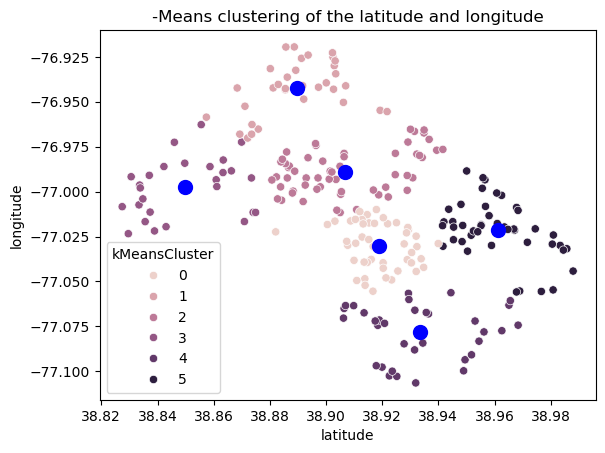

In [197]:
create_cluster(X, 6)

### 5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)

In [318]:
def do_dbscan(_X, _eps, _min_samples):
    _X = _X.copy()
    dbscan = DBSCAN(eps=_eps, min_samples=_min_samples)
    _X["DBSCAN Clustering"] = dbscan.fit_predict(_X)  

    plt.figure(figsize=(8, 4))
    sns.scatterplot(data = _X, x = "latitude", y = "longitude", hue = "DBSCAN Clustering")
    plt.title("DBSCAN clustering of latitude-longitude data with eps: " + str(_eps) + ", min_samples: " + str(_min_samples))
    plt.show()

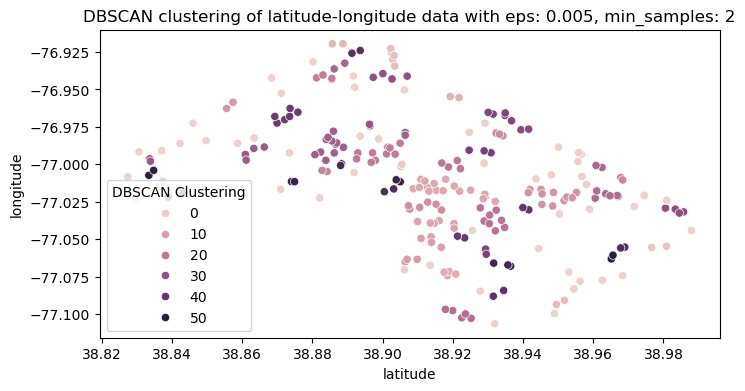

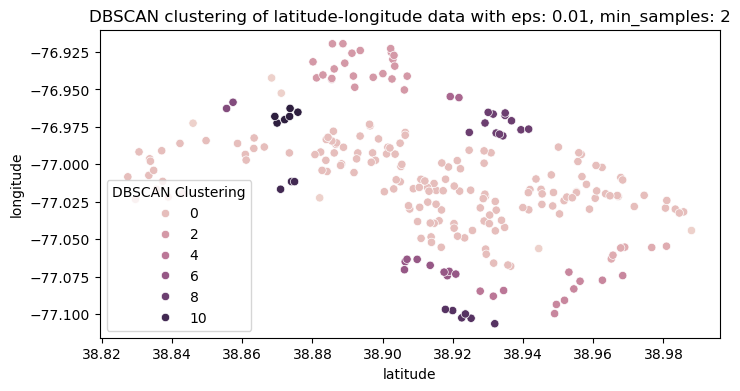

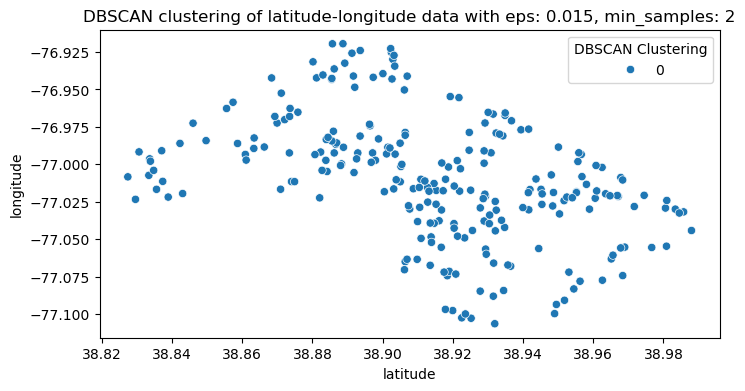

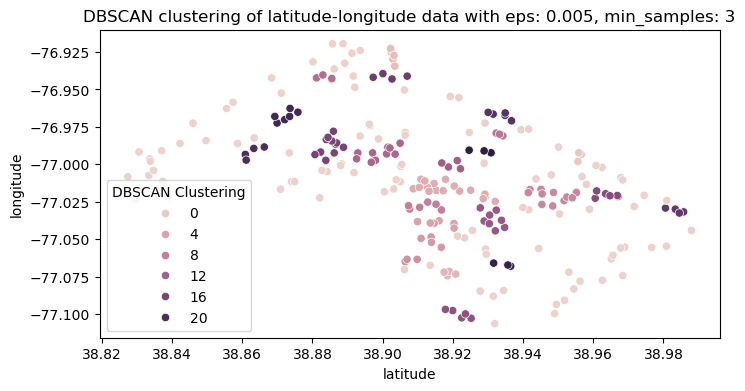

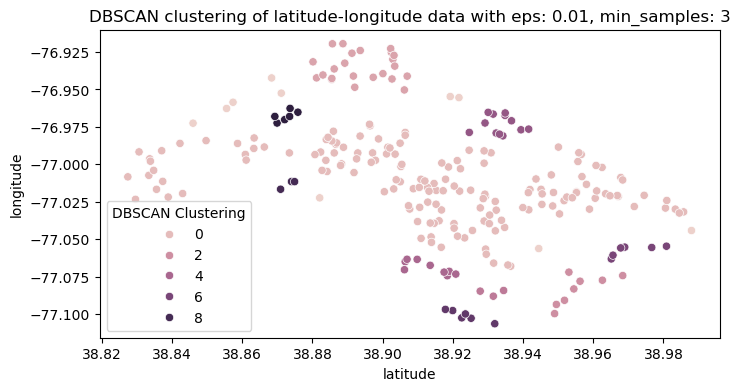

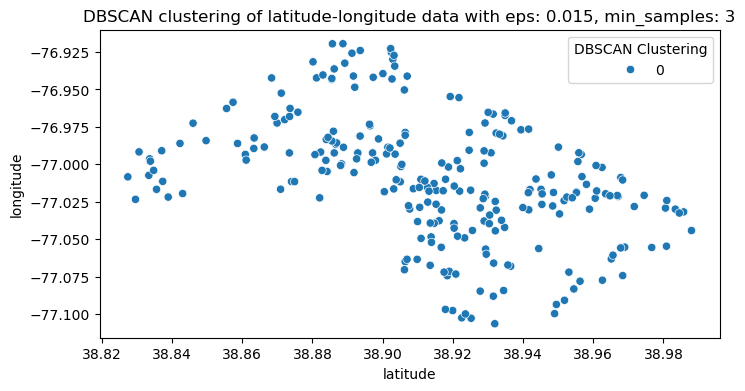

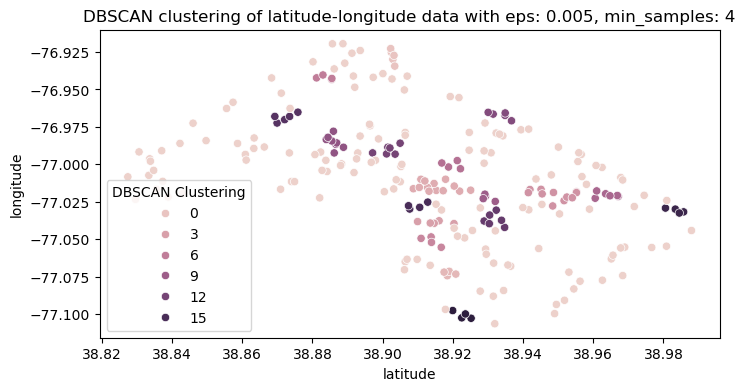

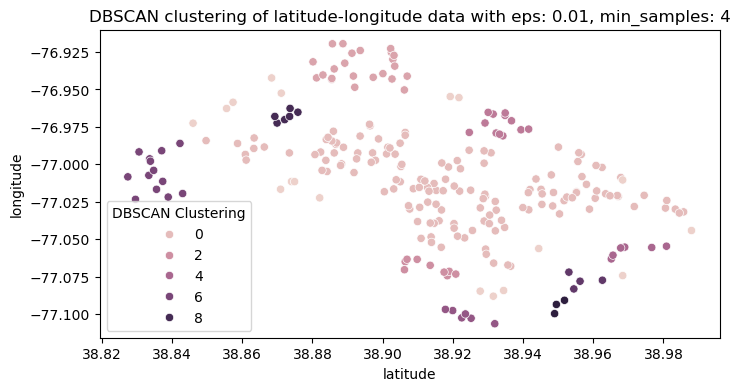

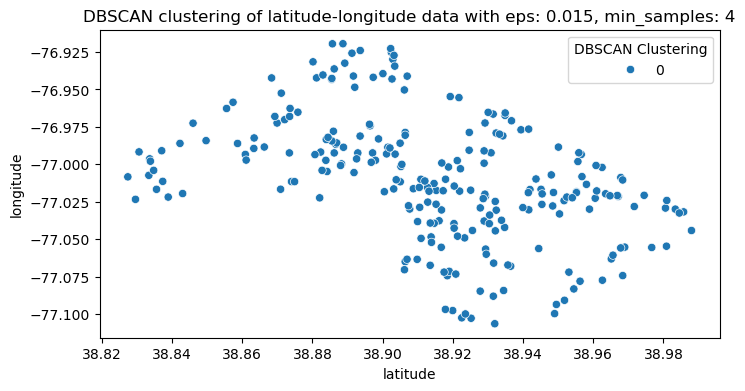

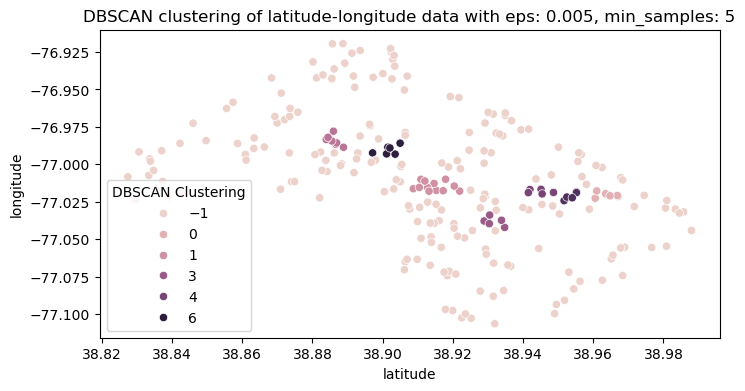

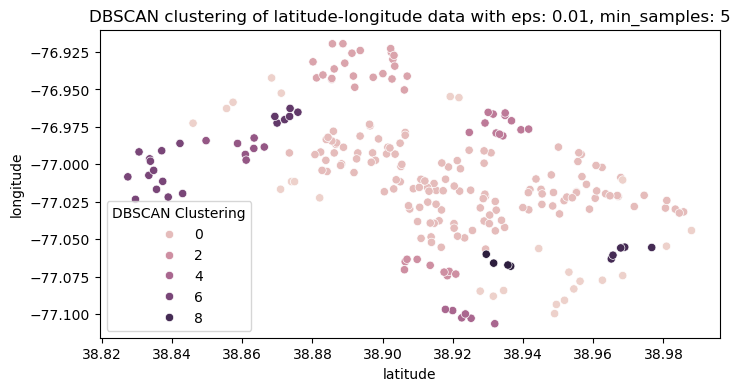

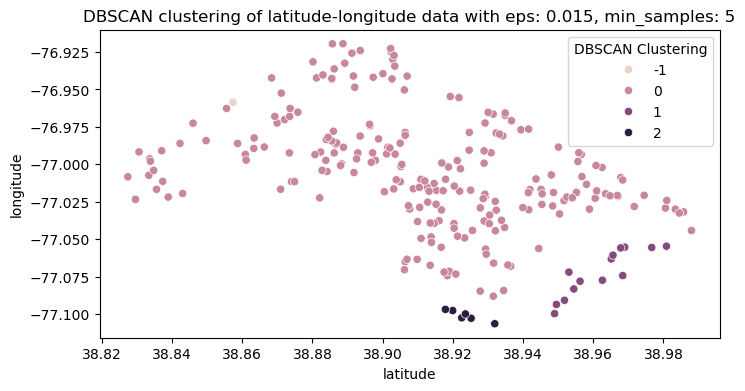

In [217]:
do_dbscan(X, 0.005, 2)
do_dbscan(X, 0.01, 2) 
do_dbscan(X, 0.015, 2)

do_dbscan(X, 0.005, 3)
do_dbscan(X, 0.01, 3) 
do_dbscan(X, 0.015, 3)

do_dbscan(X, 0.005, 4)
do_dbscan(X, 0.01, 4) 
do_dbscan(X, 0.015, 4)

do_dbscan(X, 0.005, 5)
do_dbscan(X, 0.01, 5) 
do_dbscan(X, 0.015, 5)

### 6. Visual the final DBSCAN clustering you decided upon in 5.

    The best general option, but doesn't capture a lot of points

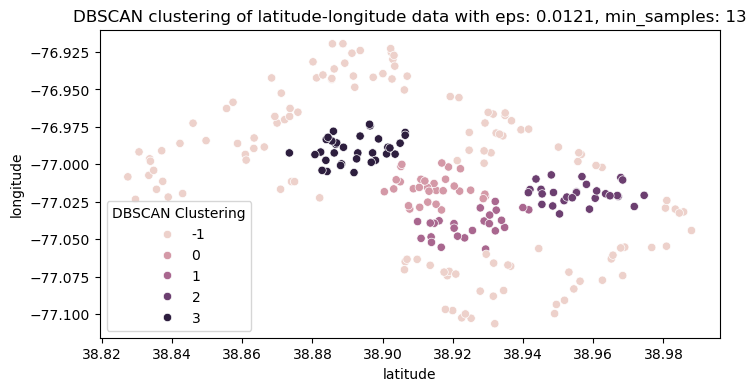

In [301]:
do_dbscan(X, 0.0121, 13)

    Similar to the best but the cluster size is smaller, but the average centroid is probably close to the same

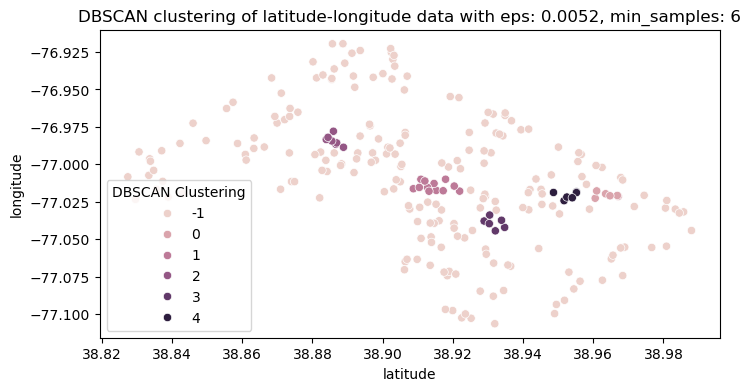

In [302]:
do_dbscan(X, 0.0052, 6)

### 7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

In [329]:
kmeanModel = KMeans(n_clusters=11)
clusters_KMeans = kmeanModel.fit_predict(X)
aggClust = AgglomerativeClustering(n_clusters=6)
clusters_aggClust = aggClust.fit_predict(X)
dbscan = DBSCAN(eps=0.0121, min_samples=13)
clusters_DBSCAN = dbscan.fit_predict(X) 

In [330]:
visData = X
visData["KMeans"] = clusters_KMeans
visData["Agglomerative"] = clusters_aggClust
visData["DBSCAN"] = clusters_DBSCAN

In [331]:
visData

,latitude,longitude,KMeans,Agglomerative,DBSCAN
0,38.956590,-76.993437,7,3,-1
1,38.905218,-77.001496,2,1,2
2,38.980858,-77.054722,7,3,-1
3,38.902925,-76.929915,0,5,-1
4,38.949498,-77.093620,8,0,-1
...,...,...,...,...,...
239,38.965620,-77.060719,10,2,-1
240,38.880730,-76.993533,5,4,4
241,38.924690,-76.978702,6,3,-1
242,38.869303,-76.968034,1,2,-1


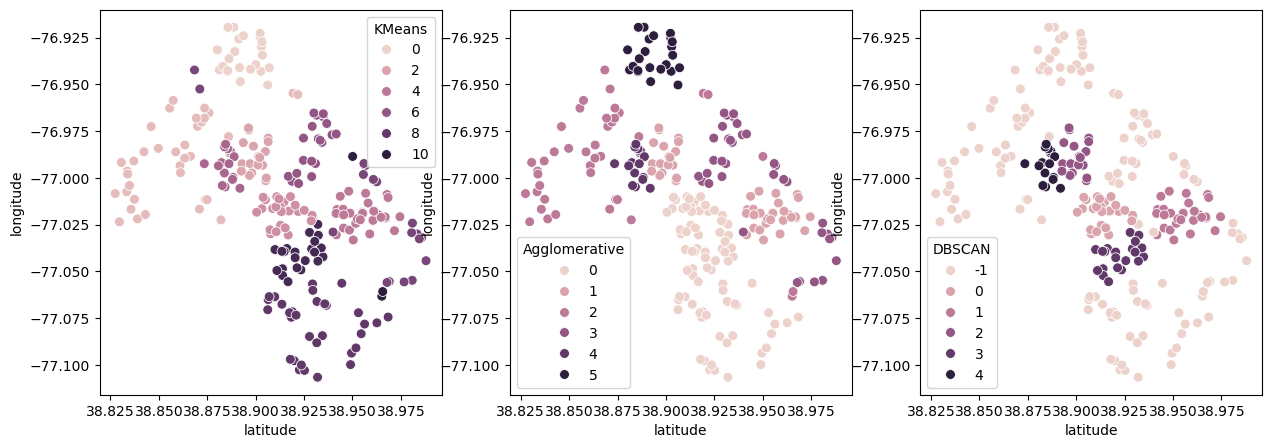

In [342]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data = visData, x = "latitude", y = "longitude", hue = "KMeans", s=50, ax=axes[0])
sns.scatterplot(data = visData, x = "latitude", y = "longitude", hue = "Agglomerative", s=50, ax=axes[1])
sns.scatterplot(data = visData, x = "latitude", y = "longitude", hue = "DBSCAN", s=50, ax=axes[2])
plt.show()

In [343]:
SilScore_df = pd.DataFrame({"Clustering method": ["KMeans", "Agglomerative", "DBSCAN"], 
                       "Silhouette Score": [silhouette_score(X=X, labels=visData["KMeans"]),
                                            silhouette_score(X=X, labels=visData["Agglomerative"]),
                                            silhouette_score(X=X, labels=visData["DBSCAN"])]})
SilScore_df

,Clustering method,Silhouette Score
0,KMeans,0.965632
1,Agglomerative,0.512404
2,DBSCAN,0.388357


In [333]:
ARI_df = pd.DataFrame({"Clustering method": ["KMeans", "KMeans", "DBSCAN"], 
                       "Comparative clustering method": ["Agglomerative", "DBSCAN", "Agglomerative"],
                       "Adjusted Rand Score": [adjusted_rand_score(visData["KMeans"], visData["Agglomerative"]),
                                               adjusted_rand_score(visData["KMeans"], visData["DBSCAN"]),
                                               adjusted_rand_score(visData["DBSCAN"], visData["Agglomerative"])]})
ARI_df

,Clustering method,Comparative clustering method,Adjusted Rand Score
0,KMeans,Agglomerative,0.591127
1,KMeans,DBSCAN,0.355685
2,DBSCAN,Agglomerative,0.231679
